In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
# Load the built-in world dataset and filter for US states
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = world[world['iso_a3'] == 'USA']

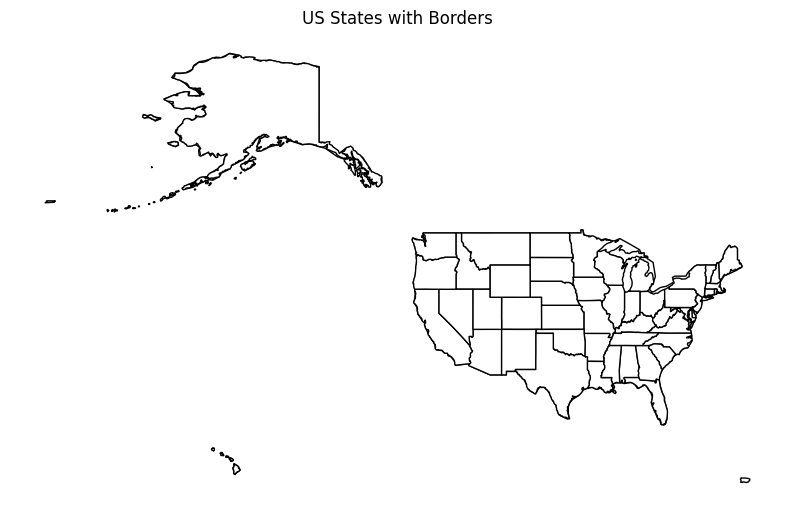

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for US states
us = world[world['iso_a3'] == 'USA']

# Load a more detailed dataset for US states borders
# This dataset is usually not built-in, so we use a public GeoJSON file for demonstration
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Plot the US map with state borders
fig, ax = plt.subplots(figsize=(10, 15))
us.plot(ax=ax, color='white', edgecolor='black')  # Plot the outline of the US
us_states.plot(ax=ax, color='white', edgecolor='black')  # Plot the states with borders

# Customize the plot
ax.set_title('US States with Borders')
plt.axis('off')  # Turn off the axis
plt.show()


In [5]:
import pandas as pd
df = pd.read_csv("US_Accidents_March23.csv")

In [6]:
# convert the Start_Time & End_Time Variable into Datetime Feature
import pandas as pd

# Assuming df is your DataFrame and Start_Time and End_Time are the columns containing date strings
df.Start_Time = pd.to_datetime(df.Start_Time, format='mixed', dayfirst=True, errors='coerce')
df.End_Time = pd.to_datetime(df.End_Time, format='mixed', dayfirst=True, errors='coerce')


In [7]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

geo_df['year'] = geo_df.Start_Time.dt.year

In [8]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'Case':'Timezone', 'count':'Cases'})


In [9]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the plot parameters for each severity
severities = {
    1: {'color': '#5cff4a', 'marker': 'o', 'size': 50, 'label': 'Severity 1'},
    2: {'color': '#ffb340', 'marker': '+', 'size': 5, 'label': 'Severity 2'},
    3: {'color': '#ff1c1c', 'marker': 'x', 'size': 10, 'label': 'Severity 3'},
    4: {'color': '#6459ff', 'marker': 'v', 'size': 1, 'label': 'Severity 4'}
}

# Plot configuration function
def plot_severity(ax, severity):
    params = severities[severity]
    ax.set_xlim([-125, -65])
    ax.set_ylim([22, 55])
    us_states.boundary.plot(ax=ax, color='black')

    geo_df[geo_df['Severity'] == severity].plot(
        ax=ax,
        markersize=params['size'],
        color=params['color'],
        marker=params['marker'],
        label=params['label']
    )

    for i in ['bottom', 'top', 'left', 'right']:
        side = ax.spines[i]
        side.set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False,
                   labelleft=False, labelbottom=False)

    ax.set_title(f'Severity {severity}', size=20, color='grey')
    ax.legend(prop={'size': 15}, loc='lower right', borderpad=1,
              labelcolor=params['color'], edgecolor='white')


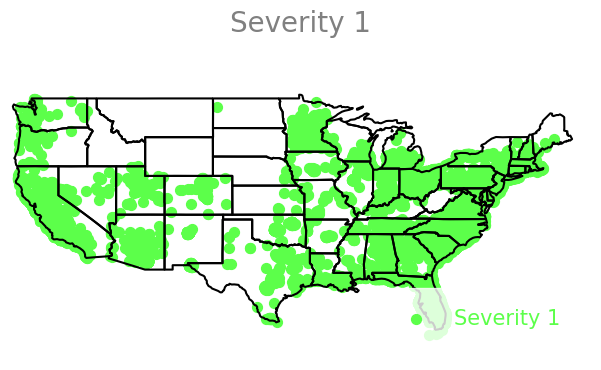

In [11]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_severity(ax, 1)
plt.show()


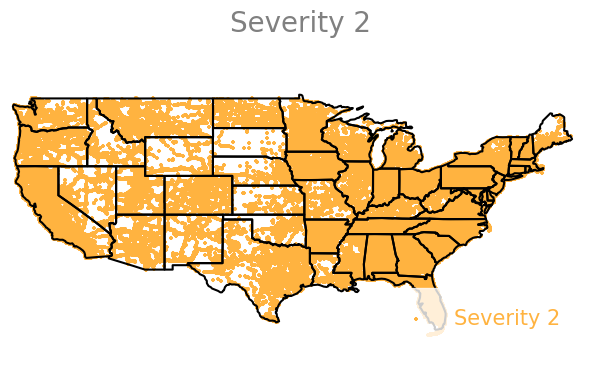

In [12]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_severity(ax, 2)
plt.show()
    

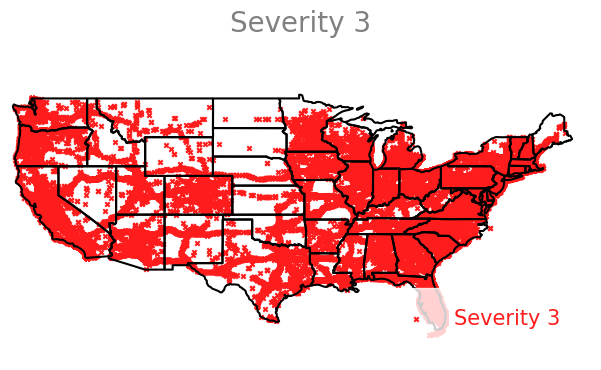

In [13]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_severity(ax, 3)
plt.show()


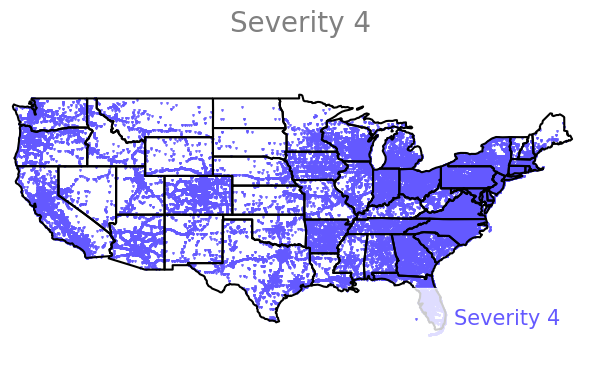

In [14]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_severity(ax, 4)
plt.show()
